# SOURCES AND SINKS IN FREESTREAM

In [51]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [52]:
N = 200                                  # Number of points in each direction
x_start, x_end = -4.0, 4.0               # x-direction boundaries
y_start, y_end = -2.0, 2.0               # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # 1D-array for x
y = np.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [53]:
np.shape(X)

(200, 200)

In [54]:
np.shape(Y)

(200, 200)

## Source in a Uniform Flow

In [55]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

In [56]:
def get_velocity(strength, xs, ys, X, Y):
    
    """
    returns the velocity field generated by a source or a sink
    
    xs: source/sink x coordinate
    ys: source/sink y coordinate
    X: x coordinate of the mesh points
    Y: y coordinate of the mesh points
    """
    
    u = strength / (2*np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2 )
    v = strength / (2*np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2 )
    
    return u, v

In [57]:
def get_stream_function(strength, xs, ys, X, Y):
    
    """
    returns the stream function generated by a source or a sink
    
    xs: source/sink x coordinate
    ys: source/sink y coordinate
    X: x coordinate of the mesh points
    Y: y coordinate of the mesh points
    """
    
    psi = strength / (2*np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

## Source Flow Velocities and Streamlines

In [72]:
source_strength = 5.0
x_source, y_source = -1.0, 0.0

# compute the velocity field
u_source, v_source = get_velocity(source_strength, x_source, y_source, X, Y)

# compute the stream function
psi_source = get_stream_function(source_strength, x_source, y_source, X, Y)

In [73]:
#super imposing all of the values together to create the whole flow field

u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream +psi_source

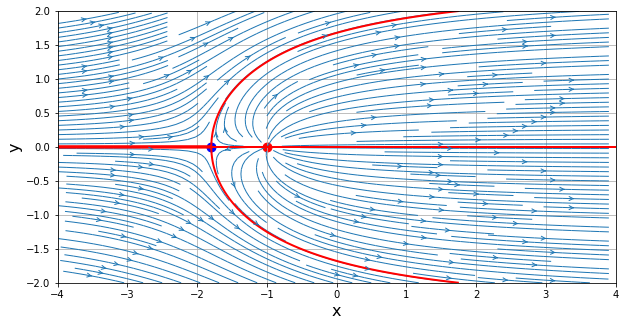

In [74]:
#plotting the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle = '->')
pyplot.scatter(x_source, y_source, color='red', s=80, marker = 'o')

#finding the stagnation point
x_stag = x_source - source_strength / (2*np.pi*u_inf)
y_stag = y_source

#plot the stagnation point
pyplot.scatter(x_stag, y_stag, color='blue', s=80, marker = 'o');

#plot the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-source_strength / 2, 0, source_strength / 2], 
               colors='red', linewidths=2, linestyles='solid');

#### Challenge Question

What is the maximum width of the Rankine Half body?

*Hint: use conservation of mass, and think about the flow when x is very large

In [75]:
b = source_strength / (2*np.pi*u_inf)
max_width = np.pi*b
print('Max width of the Rankine Half Body = {} for source strength = {}'.format(max_width, source_strength))

Max width of the Rankine Half Body = 2.5 for source strength = 5.0


In [76]:
http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/fprops/poten/node35.html

SyntaxError: invalid syntax (<ipython-input-76-c5be14d48278>, line 1)

## Source and Sink Pair in a Uniform Flow

In [98]:
sink_strength = -5.0
x_sink, y_sink = 1, 0.0

# compute the velocity field
u_sink, v_sink = get_velocity(sink_strength, x_sink, y_sink, X, Y)

# compute the stream function
psi_sink = get_stream_function(sink_strength, x_sink, y_sink, X, Y)

In [99]:
#super imposing all of the values together to create the whole flow field

u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

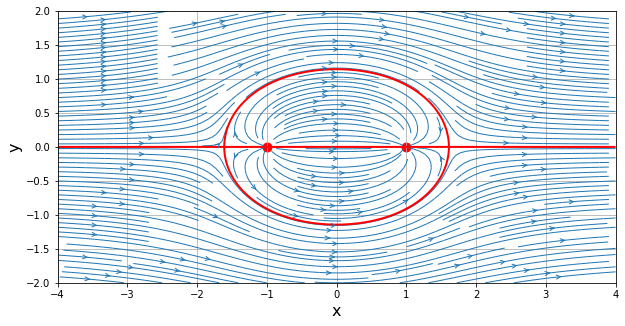

In [100]:
#plotting the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle = '->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='red', s=80, marker = 'o')


#plot the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[0.], 
               colors='red', linewidths=2, linestyles='solid');

## Bernoulli's Equation and the Pressure Coefficient

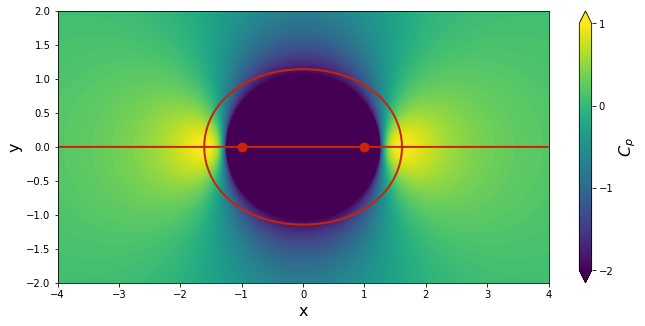

In [101]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');